Heart Disease Classification Model
- if we finish early then we can add other illnesses

Type of model?
- logistic regression
- decision trees
- neural networks
- GBM
- Random Forest


## Section 1: Dataset

The `Cleveland Clinic Heart Disease Dataset` kaggle dataset comprises of 303 observations, 13 features and 1 target attribute. The 13 features include the results of the aforementioned non-invasive diagnostic tests along with other relevant patient information. The target variable includes the result of the invasive coronary angiogram which represents the presence or absence of coronary artery disease in the patient with 0 representing absence of CHD and labels 1-4 representing presence of CHD.

I chose this dataset to work because my dad suffered from heart disease. By analyzing data from past heart disease cases, I might be able to identify patterns and trends that may on contributed to the presence of this disease in a patient. 

In [21]:
# library imports for project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# found on web to print dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cleveland-clinic-heart-disease-dataset/processed_cleveland.csv


## Section 2: Exploratory Data Analysis



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('/kaggle/input/cleveland-clinic-heart-disease-dataset/processed_cleveland.csv')
exang_num =dataset[['exang','num']].groupby('num').mean()
cp_num = dataset[['cp','num']].groupby('num').mean()
exang_num
dataset.head(10)
# cp_num
# sns.regplot(data = exang_num, x = 'num', y ='exang')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


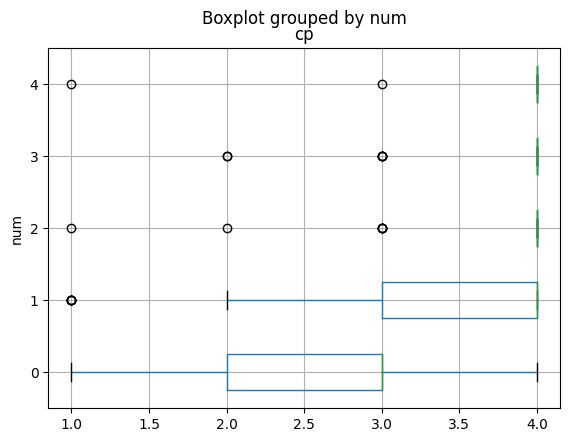

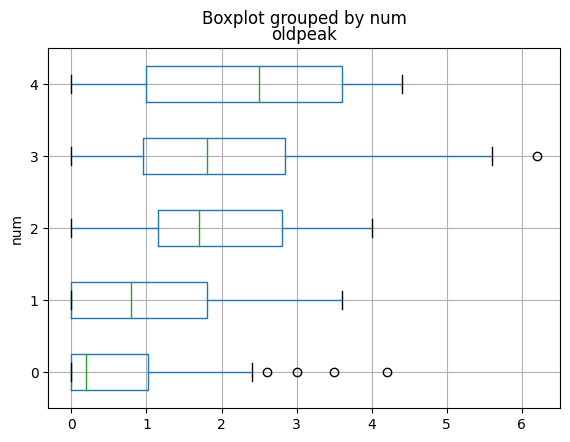

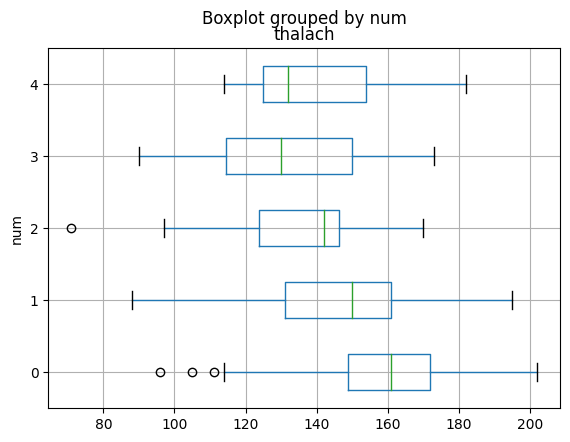

In [23]:
dataset.boxplot(column=['cp'], by='num', vert=False)
dataset.boxplot(column=['oldpeak'], by='num', vert=False)
dataset.boxplot(column=['thalach'], by='num', vert=False)

plt.show()

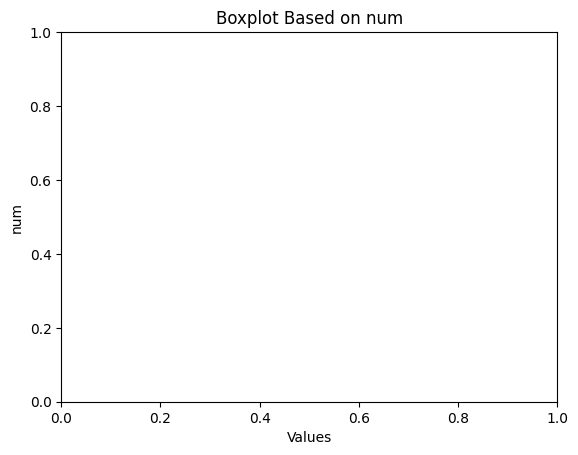

In [24]:
# Boxplot based on the 'num' column


# Adding labels and title
plt.xlabel('Values')
plt.ylabel('num')
plt.title('Boxplot Based on num')

# Show the plot
plt.show()

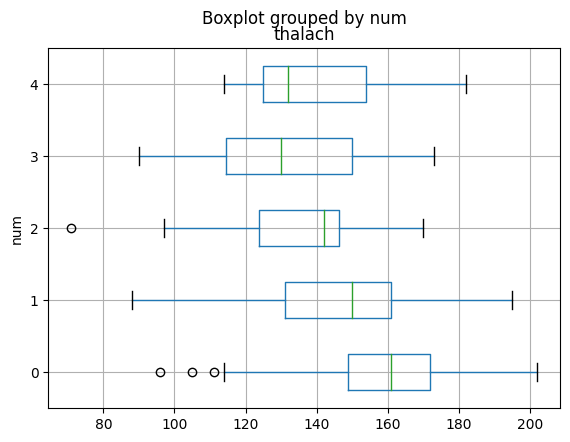

In [25]:
dataset.boxplot(column=['thalach'], by='num', vert=False)


# Show the plot
plt.show()

In [26]:
# Cleaning the data
cleaning = lambda q: sqldf(q, globals())
dataset = dataset.replace('?', np.nan)
dataset = dataset.dropna()
dataset['num'] = dataset['num'].apply(lambda x: 1 if x > 0 else 0)
# Replace '?' with NULL
query = """
SELECT 
    *, 
    CASE WHEN num = '?' THEN NULL ELSE num END as new_num
FROM 
    dataset
"""
dataset = cleaning(query)

# Drop rows with NULL values
query = """
SELECT 
    *
FROM 
    dataset
WHERE 
    new_num IS NOT NULL
"""
dataset = cleaning(query)

# Convert 'num' column to binary format
query = """
SELECT 
    *, 
    CASE WHEN new_num > 0 THEN 1 ELSE 0 END as final_num
FROM 
    dataset
"""
dataset = cleaning(query)

In [27]:
nRow, nCol = dataset.shape
print(f'{nRow} rows and {nCol} columns')


297 rows and 16 columns


Accuracy: 88.33


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


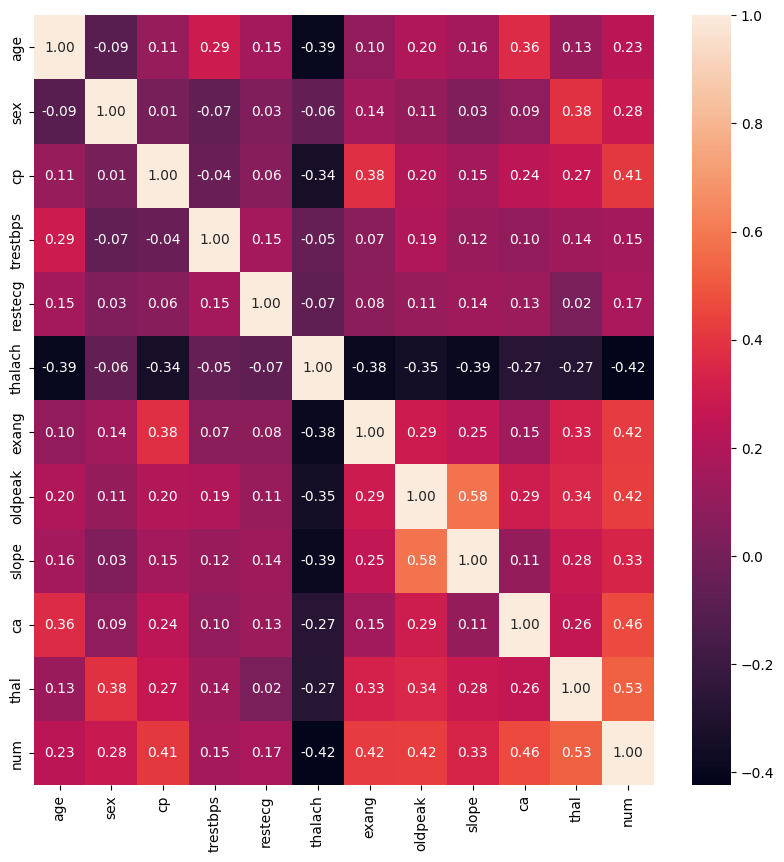

In [28]:
#Using Scikit
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target
features = ['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = ['num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=100)

# Train the model
model.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = dataset[features + target].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()